In [1]:
import pandas as pd
# 무시
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

In [2]:
import FinanceDataReader as fdr
df = fdr.DataReader('112040', '2022')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,183000,188100,179800,183900,1398879,0.033727
2022-01-04,182400,182900,168000,169200,1834411,-0.079935
2022-01-05,166200,166300,155100,156600,1627292,-0.074468
2022-01-06,150400,153700,138000,138200,2502052,-0.117497
2022-01-07,142400,155800,141800,150800,2442531,0.091172


<Axes: xlabel='Date'>

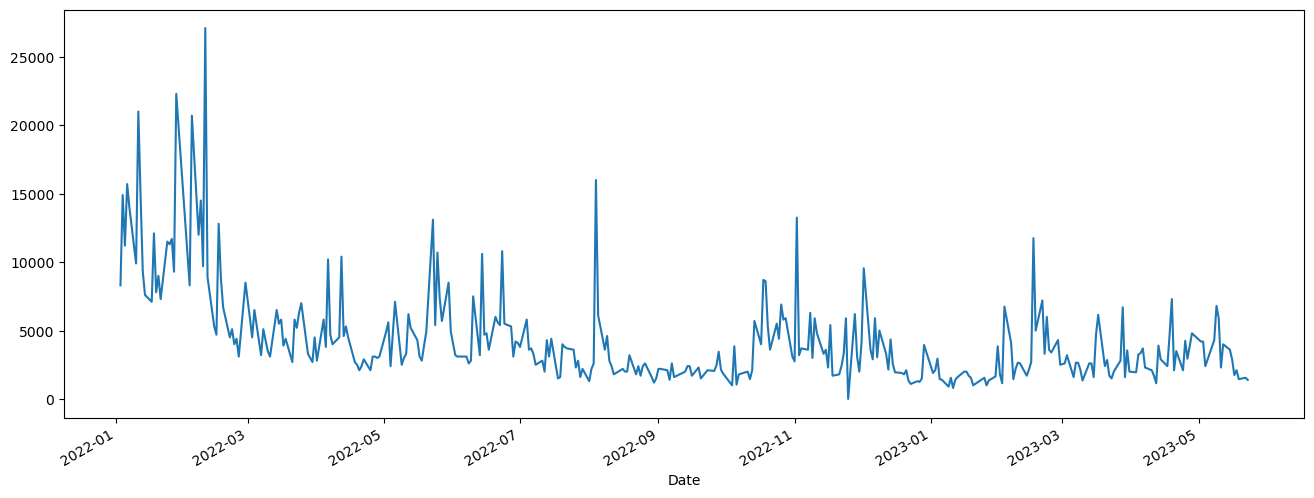

In [3]:
(df['High'] - df['Low']).plot(figsize = (16, 6))

In [4]:
# HIGH - LOW 가 크다 vs HIGH - LOW 가 작다.

<Axes: xlabel='Date'>

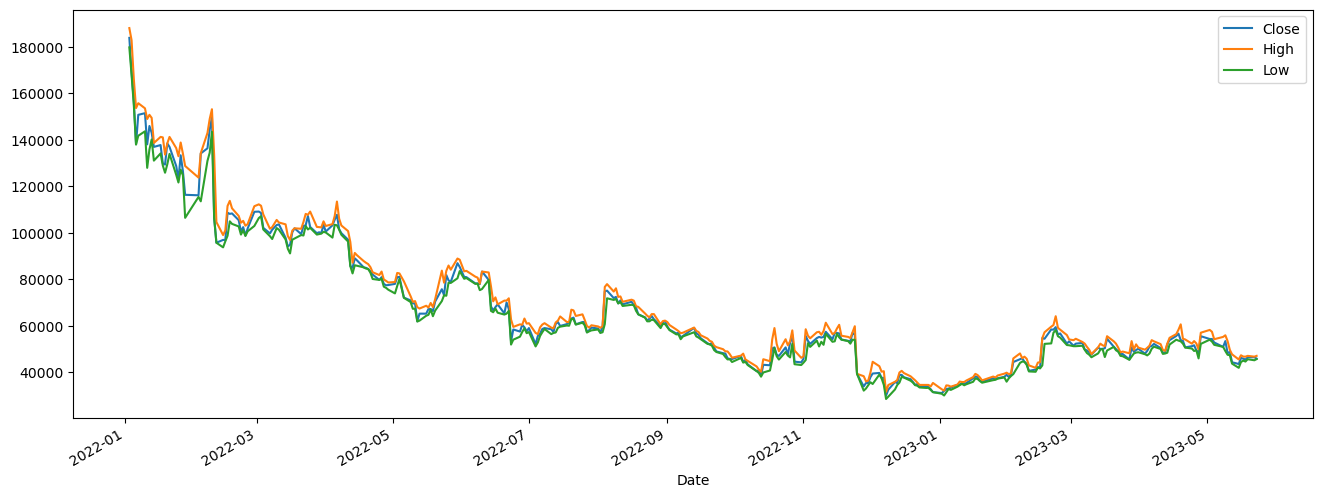

In [5]:
# 주식의 가격이 오른다(시장경제) -> 매수량이 많다.
# 사려는 사람이 많다 -> 미래에도 오를 것이다. -> 원하는 사람이 많다.
df[['Close', 'High', 'Low']].plot(figsize = (16,6))

In [6]:
df['Range'] = df['High'] - df['Low']
df['yesterday_Range'] = df['Range'].shift()
df.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range
Date,,,,,,,,
2022-01-03,183000,188100,179800,183900,1398879,0.033727,8300,NaN
2022-01-04,182400,182900,168000,169200,1834411,-0.079935,14900,8300.0
2022-01-05,166200,166300,155100,156600,1627292,-0.074468,11200,14900.0
2022-01-06,150400,153700,138000,138200,2502052,-0.117497,15700,11200.0
2022-01-07,142400,155800,141800,150800,2442531,0.091172,14000,15700.0


In [7]:
# 시가 대비 전날 변동성에서 절반 이상 상승 -> 사려는 사람이 많다.
df['Buy_Price'] = df['Open'] + df['yesterday_Range'] * 0.5
df.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price
Date,,,,,,,,,
2022-01-03,183000,188100,179800,183900,1398879,0.033727,8300,NaN,NaN
2022-01-04,182400,182900,168000,169200,1834411,-0.079935,14900,8300.0,186550.0
2022-01-05,166200,166300,155100,156600,1627292,-0.074468,11200,14900.0,173650.0
2022-01-06,150400,153700,138000,138200,2502052,-0.117497,15700,11200.0,156000.0
2022-01-07,142400,155800,141800,150800,2442531,0.091172,14000,15700.0,150250.0


In [8]:
df = df.dropna()

In [9]:
import numpy as np
df['Buy_Signal'] = np.where(df['High'] >= df['Buy_Price'], 1, 0)
df.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,Buy_Signal
Date,,,,,,,,,,
2022-01-04,182400,182900,168000,169200,1834411,-0.079935,14900,8300.0,186550.0,0
2022-01-05,166200,166300,155100,156600,1627292,-0.074468,11200,14900.0,173650.0,0
2022-01-06,150400,153700,138000,138200,2502052,-0.117497,15700,11200.0,156000.0,0
2022-01-07,142400,155800,141800,150800,2442531,0.091172,14000,15700.0,150250.0,1
2022-01-10,144000,153600,143700,151500,1135945,0.004642,9900,14000.0,151000.0,1


In [10]:
df['Return'] = np.where(df['Buy_Signal'] == 1, df['Close']-df['Buy_Price'], None)
df['rate_of_return'] = np.where(df['Buy_Signal'] == 1, (df['Close'] / df['Buy_Price']) - 1, None)
df.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,Buy_Signal,Return,rate_of_return
Date,,,,,,,,,,,,
2022-01-04,182400,182900,168000,169200,1834411,-0.079935,14900,8300.0,186550.0,0,None,None
2022-01-05,166200,166300,155100,156600,1627292,-0.074468,11200,14900.0,173650.0,0,None,None
2022-01-06,150400,153700,138000,138200,2502052,-0.117497,15700,11200.0,156000.0,0,None,None
2022-01-07,142400,155800,141800,150800,2442531,0.091172,14000,15700.0,150250.0,1,550.0,0.003661
2022-01-10,144000,153600,143700,151500,1135945,0.004642,9900,14000.0,151000.0,1,500.0,0.003311


In [11]:
df['cum_ror'] = (df['rate_of_return'] + 1).cumprod() - 1
df.tail()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,Buy_Signal,Return,rate_of_return,cum_ror
Date,,,,,,,,,,,,,
2023-05-17,46800,46850,45100,45950,497000,-0.006486,1750,2900.0,48250.0,0,None,None,NaN
2023-05-18,46650,46800,44700,45550,402416,-0.008705,2100,1750.0,47525.0,0,None,None,NaN
2023-05-19,45800,47150,45700,46550,461203,0.021954,1450,2100.0,46850.0,1,-300.0,-0.006403,-0.363215
2023-05-22,45700,46800,45250,46550,371124,0.000000,1550,1450.0,46425.0,1,125.0,0.002693,-0.3615
2023-05-23,46550,47150,45750,45950,352799,-0.012889,1400,1550.0,47325.0,0,None,None,NaN


In [12]:
start_date = df.index[0]
end_date = df.index[-1]
year = (end_date - start_date).days / 365
year

1.3808219178082193

In [13]:
last_cum_ror = df['cum_ror'].dropna(axis = 0).iloc[-1]

CAGR = (1 + last_cum_ror) ** (1/year) - 1
print(f'CAGR : {round(CAGR * 100, 2)} %')

CAGR : -27.74 %


### Buy & Hold vs 변동성 돌파

In [14]:
buy_and_hold = df[['Close']]
buy_and_hold.head()

,Close
Date,
2022-01-04,169200
2022-01-05,156600
2022-01-06,138200
2022-01-07,150800
2022-01-10,151500


In [15]:
buy_and_hold['rate_of_return'] = buy_and_hold['Close'].pct_change() # 수익률
buy_and_hold['cum_ror'] = (buy_and_hold['rate_of_return'] + 1).cumprod() - 1 # 누적수익률

start_date = buy_and_hold.index[0]
end_date = buy_and_hold.index[-1]
year = (end_date - start_date).days / 365

last_cum_ror = buy_and_hold['cum_ror'].dropna(axis = 0).iloc[-1]

buy_and_hold_CAGR = (1 + last_cum_ror) ** (1/year) - 1
print(f'CAGR : {round(buy_and_hold_CAGR * 100, 2)} %')

CAGR : -61.09 %


In [16]:
df.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,Buy_Signal,Return,rate_of_return,cum_ror
Date,,,,,,,,,,,,,
2022-01-04,182400,182900,168000,169200,1834411,-0.079935,14900,8300.0,186550.0,0,None,None,NaN
2022-01-05,166200,166300,155100,156600,1627292,-0.074468,11200,14900.0,173650.0,0,None,None,NaN
2022-01-06,150400,153700,138000,138200,2502052,-0.117497,15700,11200.0,156000.0,0,None,None,NaN
2022-01-07,142400,155800,141800,150800,2442531,0.091172,14000,15700.0,150250.0,1,550.0,0.003661,0.003661
2022-01-10,144000,153600,143700,151500,1135945,0.004642,9900,14000.0,151000.0,1,500.0,0.003311,0.006984


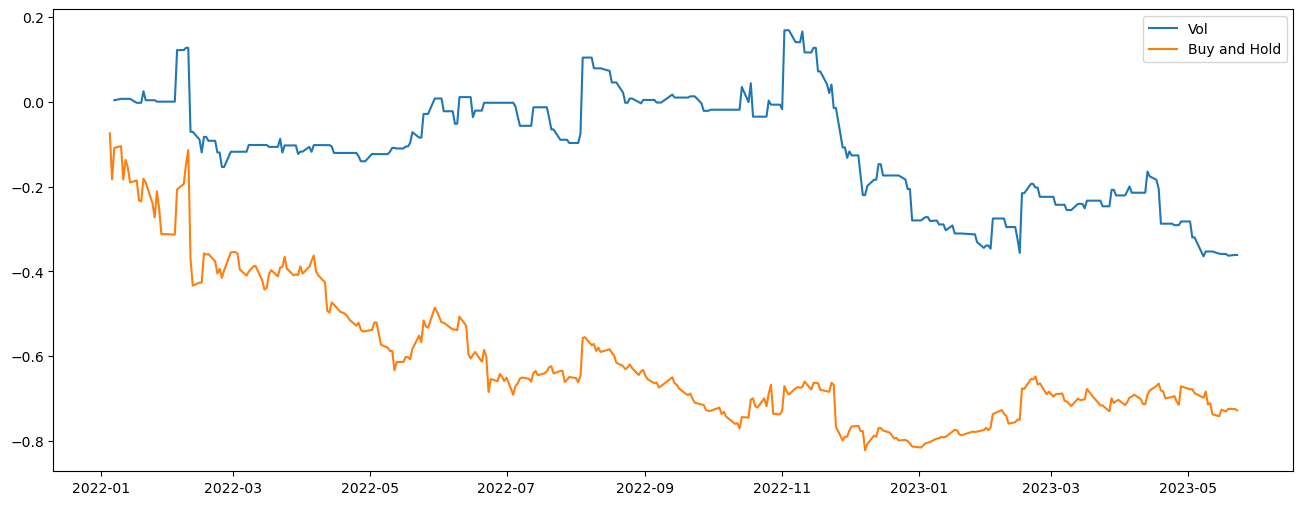

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,6))
plt.plot(df.index, df['cum_ror'].fillna(method = 'ffill'), label = 'Vol')
plt.plot(buy_and_hold.index, buy_and_hold['cum_ror'], label = 'Buy and Hold')
plt.legend()

# 이동평균으로 상승장 여부를 판단하여 전략 수정

In [18]:
rising_df_buy = df[df['Buy_Signal'] == 1].loc[:,:'Buy_Price']
rising_df_buy.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price
Date,,,,,,,,,
2022-01-07,142400,155800,141800,150800,2442531,0.091172,14000,15700.0,150250.0
2022-01-10,144000,153600,143700,151500,1135945,0.004642,9900,14000.0,151000.0
2022-01-17,135300,141300,134200,137800,632229,0.005839,7100,7600.0,139100.0
2022-01-20,130900,138500,129500,138500,955399,0.070325,9000,7800.0,134800.0
2022-01-21,135400,141300,134000,137000,946942,-0.010830,7300,9000.0,139900.0


In [19]:
rising_df_buy['MA10'] = rising_df_buy['Close'].rolling(10, min_periods = 1).mean()
rising_df_buy.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,MA10
Date,,,,,,,,,,
2022-01-07,142400,155800,141800,150800,2442531,0.091172,14000,15700.0,150250.0,150800.0
2022-01-10,144000,153600,143700,151500,1135945,0.004642,9900,14000.0,151000.0,151150.0
2022-01-17,135300,141300,134200,137800,632229,0.005839,7100,7600.0,139100.0,146700.0
2022-01-20,130900,138500,129500,138500,955399,0.070325,9000,7800.0,134800.0,144650.0
2022-01-21,135400,141300,134000,137000,946942,-0.010830,7300,9000.0,139900.0,143120.0


<Axes: xlabel='Date'>

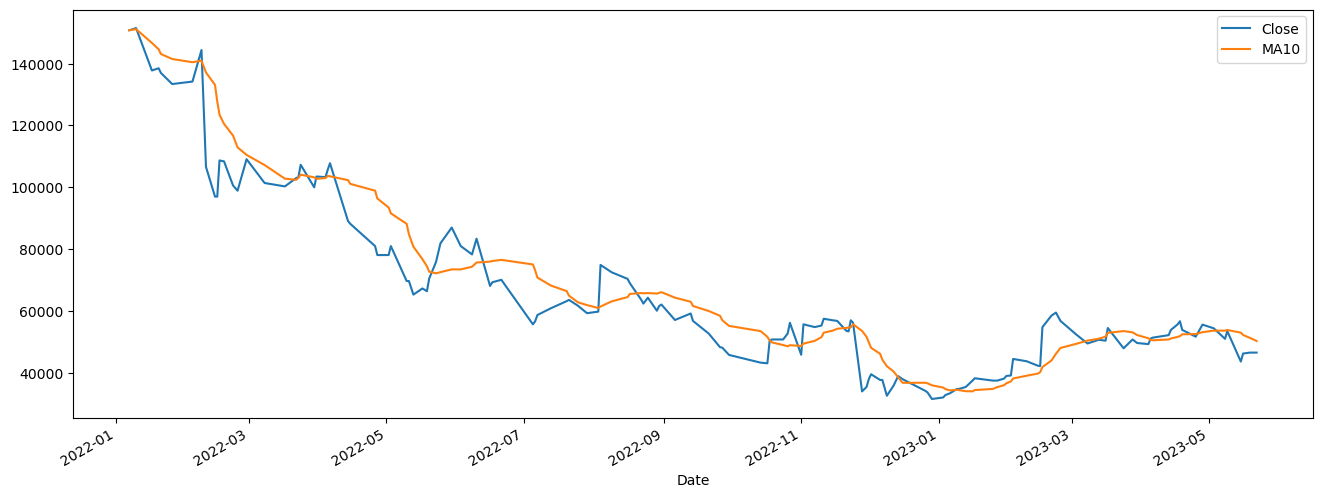

In [20]:
rising_df_buy[['Close', 'MA10']].plot(figsize = (16, 6))

In [21]:
rising_df_buy['is_uptrend'] = np.where(rising_df_buy['MA10'] <= rising_df_buy['Close'], True, None)
rising_df_buy.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,MA10,is_uptrend
Date,,,,,,,,,,,
2022-01-07,142400,155800,141800,150800,2442531,0.091172,14000,15700.0,150250.0,150800.0,True
2022-01-10,144000,153600,143700,151500,1135945,0.004642,9900,14000.0,151000.0,151150.0,True
2022-01-17,135300,141300,134200,137800,632229,0.005839,7100,7600.0,139100.0,146700.0,None
2022-01-20,130900,138500,129500,138500,955399,0.070325,9000,7800.0,134800.0,144650.0,None
2022-01-21,135400,141300,134000,137000,946942,-0.010830,7300,9000.0,139900.0,143120.0,None


In [22]:
rising_df_buy.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,MA10,is_uptrend
Date,,,,,,,,,,,
2022-01-07,142400,155800,141800,150800,2442531,0.091172,14000,15700.0,150250.0,150800.0,True
2022-01-10,144000,153600,143700,151500,1135945,0.004642,9900,14000.0,151000.0,151150.0,True
2022-01-17,135300,141300,134200,137800,632229,0.005839,7100,7600.0,139100.0,146700.0,None
2022-01-20,130900,138500,129500,138500,955399,0.070325,9000,7800.0,134800.0,144650.0,None
2022-01-21,135400,141300,134000,137000,946942,-0.010830,7300,9000.0,139900.0,143120.0,None


In [23]:
uptrend_cond = (rising_df_buy['is_uptrend'] == True)

uptrend_trade_ror = (rising_df_buy['Close'] / rising_df_buy['Open']) -1
default_trade_ror = (rising_df_buy['Close'] / rising_df_buy['Buy_Price']) -1

In [24]:
# 상승장 True -> Hold -> Open에사서 Close에 판다.
# 상승장 False -> 그대로 -> Target price에사서 Close에 판다.
rising_df_buy['uptrend_ror'] = np.where(uptrend_cond, uptrend_trade_ror, default_trade_ror)
rising_df_buy.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,MA10,is_uptrend,uptrend_ror
Date,,,,,,,,,,,,
2022-01-07,142400,155800,141800,150800,2442531,0.091172,14000,15700.0,150250.0,150800.0,True,0.058989
2022-01-10,144000,153600,143700,151500,1135945,0.004642,9900,14000.0,151000.0,151150.0,True,0.052083
2022-01-17,135300,141300,134200,137800,632229,0.005839,7100,7600.0,139100.0,146700.0,None,-0.009346
2022-01-20,130900,138500,129500,138500,955399,0.070325,9000,7800.0,134800.0,144650.0,None,0.027448
2022-01-21,135400,141300,134000,137000,946942,-0.010830,7300,9000.0,139900.0,143120.0,None,-0.020729


In [25]:
rising_df_buy['cum_ror'] = (rising_df_buy['uptrend_ror'] + 1).cumprod() - 1
rising_df_buy.tail()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,MA10,is_uptrend,uptrend_ror,cum_ror
Date,,,,,,,,,,,,,
2023-05-09,50400,56000,49200,53500,2417157,0.049020,6800,4300.0,52550.0,53860.0,None,0.018078,2.886883
2023-05-15,42000,45600,42000,43650,1009047,-0.016892,3600,4000.0,44000.0,53005.0,None,-0.007955,2.855965
2023-05-16,44500,47400,44500,46250,1085568,0.059565,2900,3600.0,46300.0,52240.0,None,-0.001080,2.851801
2023-05-19,45800,47150,45700,46550,461203,0.021954,1450,2100.0,46850.0,51325.0,None,-0.006403,2.827136
2023-05-22,45700,46800,45250,46550,371124,0.000000,1550,1450.0,46425.0,50310.0,None,0.002693,2.837440


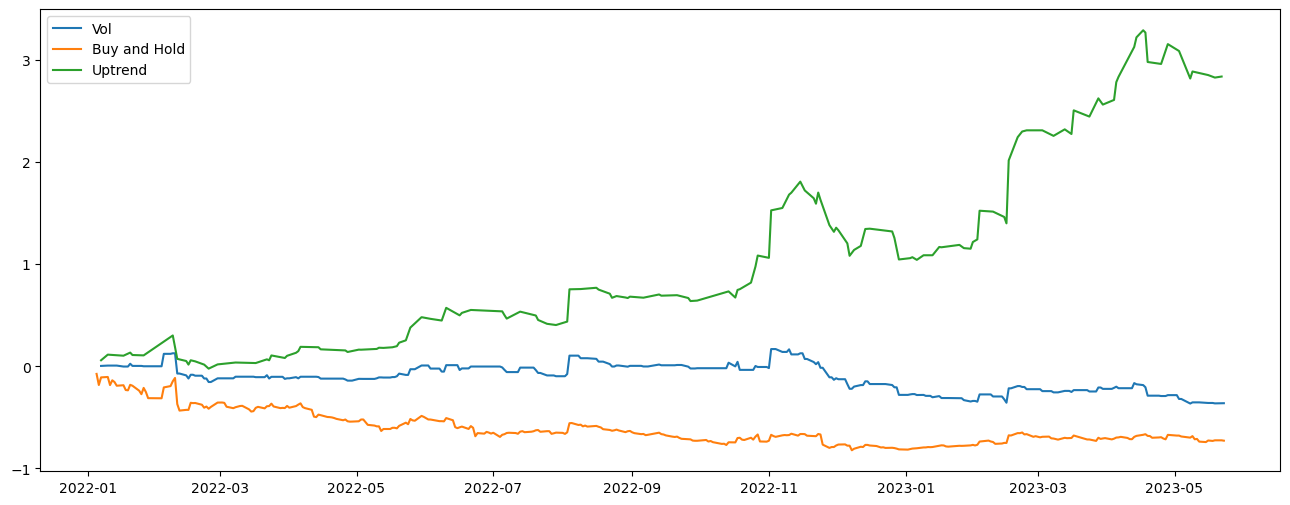

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,6))
plt.plot(df.index, df['cum_ror'].fillna(method = 'ffill'), label = 'Vol')
plt.plot(buy_and_hold.index, buy_and_hold['cum_ror'], label = 'Buy and Hold')
plt.plot(rising_df_buy.index, rising_df_buy['cum_ror'], label = 'Uptrend')
plt.legend()